<br />

<div style="text-align: center;">
<font size="7">数値計算試験問題</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">2023/07/12 実施</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2023 </font>
</div>

 # 1 簡単な行列計算:25点 
 
 次の行列
  $
  A = \left(\begin{array}{ccc}
    4 & 5 & 5 \\
    -4 & -5 & -7 \\
    4 & 4 & 6
  \end{array}
  \right)
  $
  の固有値と固有ベクトルを求めよ．
  
  また，固有ベクトルで構成される対角化行列$P$ を用いて，ドット演算 により$P^{-1}.A.P$が対角化されることを確かめよ．


In [1]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}) 

aa = np.array([[4,5,5],[-4,-5,-7],[4,4,6]])
print(aa)

[[ 4  5  5]
 [-4 -5 -7]
 [ 4  4  6]]


In [2]:
import scipy.linalg as linalg
l, PP = linalg.eig(aa)
print(l)
print(PP)

[ 4.+0.j  2.+0.j -1.+0.j]
[[-0.333  0.000 -0.707]
 [ 0.667  0.707  0.707]
 [-0.667 -0.707  0.000]]


In [3]:
linalg.inv(PP).dot(aa).dot(PP)

array([[ 4.000,  0.000,  0.000],
       [ 0.000,  2.000, -0.000],
       [ 0.000,  0.000, -1.000]])

# 2 ニュートンの差分商補間:25点

三次関数$x^3$の$x=0.75$における値$F(0.75)$をニュートンの差分商補間を用いて求める．
ニュートンの内挿公式は，
$$
\begin{array}{rc}
F (x )&=F (x _{0})+
(x -x _{0})f _{1}\lfloor x_0,x_1\rfloor+
(x -x _{0})(x -x _{1})
f _{2}\lfloor x_0,x_1,x_2\rfloor + \\
& \cdots +  \prod_{i=0}^{n-1} (x-x_i) \, 
f_n \lfloor x_0,x_1,\cdots,x_n \rfloor
\end{array}
$$
である．ここで$f_i \lfloor\, \rfloor$ は次のような関数を意味していて，
$$
\begin{array}{rc}
f _{1}\lfloor x_0,x_1\rfloor &=&  \frac{y_1-y_0}{x_1-x_0} \\
f _{2}\lfloor x_0,x_1,x_2\rfloor &=&  \frac{f _{1}\lfloor x_1,x_2\rfloor-
f _{1}\lfloor x_0,x_1\rfloor}{x_2-x_0} \\
\vdots & \\
f _{n}\lfloor x_0,x_1,\cdots,x_n\rfloor &=&  \frac{f_{n-1}\lfloor x_1,x_2\cdots,x_{n}\rfloor-
f _{n-1}\lfloor x_0,x_1,\cdots,x_{n-1}\rfloor}{x_n-x_0} 
\end{array}
$$
差分商と呼ばれる．$x_k=-1,0,1,2$をそれぞれ選ぶと，差分商補間のそれぞれの項は以下の通りとなる．

$$
\begin{array}{ccl|lll}
\hline
k  &  x_k & y_k=F_0( x_k) &f_1\lfloor x_k,x_{k+1}\rfloor & f_2\lfloor x_k,x_{k+1},x_{k+2}\rfloor &  f_3\lfloor x_k,x_{k+1},x_{k+2},x_{k+3}\rfloor \\
\hline
0  &   -1.0  &  -1.0  &          &              &\\
&      &     &     1.0  &              &\\ 
1  &   0.0  &  0.0  &           &    [ XXX ]     &\\
&      &     &     1.0    &              & 1.0 \\
2  &  1.0  &  1.0  &           &     3.0   &\\ 
&      &     &     7.0   &              &\\ 
3  &  2.0  & 8.0 &           &              &\\ 
\hline
\end{array}
$$
それぞれの項は，例えば，

$$
f_1\lfloor x_0,x_1 \rfloor =\frac{0.0-(-1.0)}{0.0-(-1.0)}=1.0
$$
で求められる．ニュートンの差分商の一次多項式の値はx=0.75で

\begin{align}
F(x)&=F_0(-1.0)+(x-x_0)f_1\lfloor x_0,x_1\rfloor  \\
& =1.0+\left(-0.75-(-1.0)\right)\times(-1.0)\\
& =0.75
\end{align}
となる．

## (1) 差分商補間の表中の開いている箇所[ XXX ]を埋めよ．
## (2)  ニュートンの二次多項式

$$
F (x )=F (x _{0})+(x -x _{0})f _{1}\lfloor x_0,x_1\rfloor+(x -x _{0})(x -x _{1})
f _{2}\lfloor x_0,x_1,x_2\rfloor
$$
の値を求めよ．
## (3) ニュートンの三次多項式の値を求めよ．
(児玉鹿三著「理工系基礎数学解析-I」(槙書店,　1967), p.294)

In [4]:
def func(x):
    return x**3

x0,x1,x2,x3=-1.0,0.0,1.0,2.0
y0,y1,y2,y3=func(x0),func(x1),func(x2),func(x3)
print(y0,y1,y2,y3)
f1_12=(y2-y1)/(x2-x1)
f1_01=(y1-y0)/(x1-x0)
f1_23=(y3-y2)/(x3-x2)
print(f1_12,f1_01)
# (1) f2_012 = (f1_12-f1_01)/(x2-x0)
f2_012=(f1_12-f1_01)/(x2-x0)
print('f2_012:',f2_012)
                    
# (2) 
f0=y0
x=0.75
f2 = f0+(x-x0)*f1_01+(x-x0)*(x-x1)*f2_012
print('f2: ',f2)
# (3)
f3_0123 =1.0
f3 = f0+(x-x0)*f1_01+(x-x0)*(x-x1)*f2_012 + +(x-x0)*(x-x1)*(x-x2)*f3_0123
print('f3:' , f3)
print(func(0.75))

-1.0 0.0 1.0 8.0
1.0 1.0
f2_012: 0.0
f2:  0.75
f3: 0.421875
0.421875


# 3 Gauss-Seidelの収束性:25点

初期値を$[0,0,0]^{t}$として，
$A(tt)x=b$ 
にガウス・ザイデルによる連立一次方程式の反復解法プログラムを適用する．
ただし，
\begin{equation}
A(tt)=
\left(
\begin{array}{ccc}
1&tt&tt \\
tt&1&tt \\
tt&tt&1
\end{array}
\right)
, \, 
b=
\left(
\begin{array}{c}
2 \\
2 \\
2 \\
\end{array}
\right)
\end{equation}

である．
$tt=0.2,0.5,0.7$ に対して有効数字6桁の解を得るための反復回数を求めよ．

(E.クライツィグ著「数値解析」(培風館,2003), p.89, 問題2.3-9)

In [5]:
import numpy as np
np.set_printoptions(precision=6, suppress=True)

tt=0.2
A=np.array([[1,tt,tt],[tt,1,tt],[tt,tt,1]])
b=np.array([2,2,2])
n=3
x0=np.zeros(n)
x1=np.zeros(n)

for iter in range(0, 9):
    for i in range(0, n):
        x1[i]=b[i]
        for j in range(0, n):
            x1[i]=x1[i]-A[i][j]*x0[j]
        x1[i]=x1[i]+A[i][i]*x0[i]
        x1[i]=x1[i]/A[i][i]
        x0[i]=x1[i]
    print(iter,x0)

0 [2.   1.6  1.28]
1 [1.424   1.4592  1.42336]
2 [1.423488 1.43063  1.429176]
3 [1.428039 1.428557 1.428681]
4 [1.428552 1.428553 1.428579]
5 [1.428574 1.42857  1.428571]
6 [1.428572 1.428571 1.428571]
7 [1.428571 1.428571 1.428571]
8 [1.428571 1.428571 1.428571]


In [6]:
import numpy as np
np.set_printoptions(precision=6, suppress=True)

tt=0.5
A=np.array([[1,tt,tt],[tt,1,tt],[tt,tt,1]])
b=np.array([2,2,2])
n=3
x0=np.zeros(n)
x1=np.zeros(n)

for iter in range(0, 16):
    for i in range(0, n):
        x1[i]=b[i]
        for j in range(0, n):
            x1[i]=x1[i]-A[i][j]*x0[j]
        x1[i]=x1[i]+A[i][i]*x0[i]
        x1[i]=x1[i]/A[i][i]
        x0[i]=x1[i]
    print(iter,x0)

0 [2.  1.  0.5]
1 [1.25   1.125  0.8125]
2 [1.03125  1.078125 0.945312]
3 [0.988281 1.033203 0.989258]
4 [0.98877  1.010986 1.000122]
5 [0.994446 1.002716 1.001419]
6 [0.997932 1.000324 1.000872]
7 [0.999402 0.999863 1.000367]
8 [0.999885 0.999874 1.000121]
9 [1.000003 0.999938 1.000029]
10 [1.000016 0.999977 1.000003]
11 [1.00001  0.999993 0.999998]
12 [1.000004 0.999999 0.999999]
13 [1.000001 1.       0.999999]
14 [1. 1. 1.]
15 [1. 1. 1.]


In [7]:
import numpy as np
np.set_printoptions(precision=6, suppress=True)

tt=0.7
A=np.array([[1,tt,tt],[tt,1,tt],[tt,tt,1]])
b=np.array([2,2,2])
n=3
x0=np.zeros(n)
x1=np.zeros(n)

for iter in range(0, 32):
    for i in range(0, n):
        x1[i]=b[i]
        for j in range(0, n):
            x1[i]=x1[i]-A[i][j]*x0[j]
        x1[i]=x1[i]+A[i][i]*x0[i]
        x1[i]=x1[i]/A[i][i]
        x0[i]=x1[i]
    print(iter,x0)

0 [2.   0.6  0.18]
1 [1.454   0.8562  0.38286]
2 [1.132658 0.939137 0.549743]
3 [0.957784 0.944731 0.66824 ]
4 [0.87092  0.922588 0.744544]
5 [0.833008 0.895714 0.789895]
6 [0.820074 0.873022 0.814833]
7 [0.818502 0.856666 0.827383]
8 [0.821166 0.846016 0.832973]
9 [0.824708 0.839623 0.834968]
10 [0.827786 0.836072 0.835299]
11 [0.83004  0.834263 0.834988]
12 [0.831524 0.833441 0.834524]
13 [0.832424 0.833136 0.834108]
14 [0.832929 0.833074 0.833798]
15 [0.83319  0.833109 0.833591]
16 [0.83331  0.833169 0.833464]
17 [0.833356 0.833225 0.833393]
18 [0.833367 0.833268 0.833355]
19 [0.833364 0.833297 0.833338]
20 [0.833356 0.833314 0.833331]
21 [0.833348 0.833325 0.833329]
22 [0.833343 0.83333  0.833329]
23 [0.833339 0.833333 0.83333 ]
24 [0.833336 0.833334 0.833331]
25 [0.833335 0.833334 0.833332]
26 [0.833334 0.833334 0.833333]
27 [0.833333 0.833334 0.833333]
28 [0.833333 0.833334 0.833333]
29 [0.833333 0.833334 0.833333]
30 [0.833333 0.833333 0.833333]
31 [0.833333 0.833333 0.833333]


# 4 ページランク:25点

次のようなリンクが張られたページ群のページランクを求めよ．

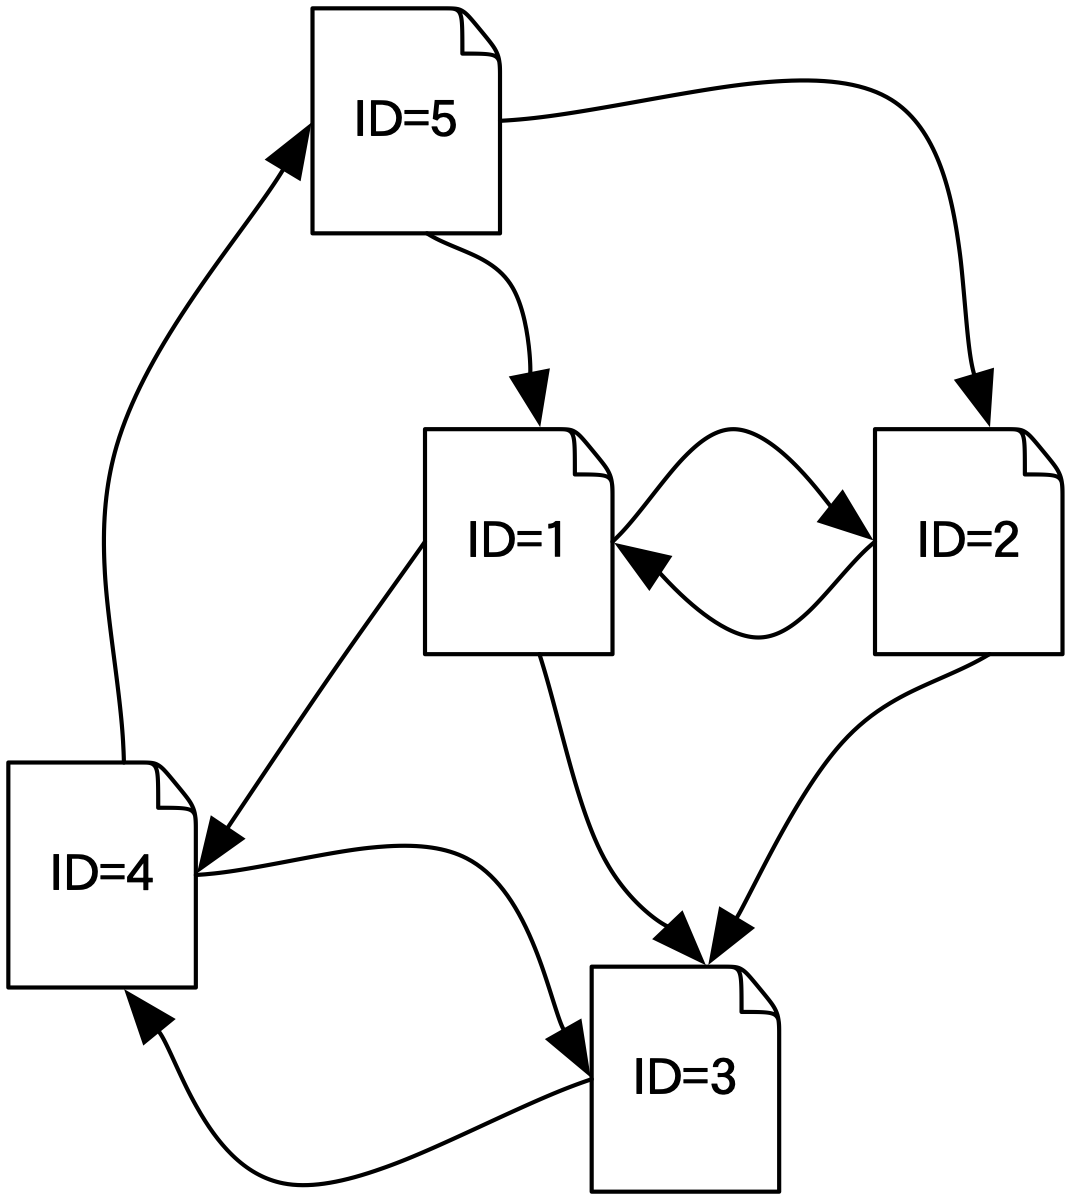

In [8]:
from pprint import pprint
from numpy import array, zeros, diagflat, dot, transpose, set_printoptions
from scipy.linalg import eig

A = array([[0,1,1,1,0],
           [1,0,1,0,0],
           [0,0,0,1,0],
           [0,0,1,0,1],
           [1,1,0,0,0]])

n = 5
diag = []
for i in range(0,n):
    tmp = 0.0
    for j in range(0,n):
        tmp += A[i,j]
    diag.append(1.0/tmp)

D = diagflat(diag)
tA = dot(transpose(A),D)

set_printoptions(formatter={'float': '{: 0.3f}'.format}) 
print(tA)

[[ 0.000  0.500  0.000  0.000  0.500]
 [ 0.333  0.000  0.000  0.000  0.500]
 [ 0.333  0.500  0.000  0.500  0.000]
 [ 0.333  0.000  1.000  0.000  0.000]
 [ 0.000  0.000  0.000  0.500  0.000]]


初期ベクトルを等分の値にして，3度ほどホップさせた結果．

In [9]:
x = array([1/5,1/5,1/5,1/5,1/5])
pprint(dot(tA,dot(tA,dot(tA,x))))


array([ 0.125,  0.111,  0.269,  0.328,  0.167])


固有値を求める．固有値がソートされているか自信がないので，表示させてみた．

In [10]:
l, V = eig(tA)
pprint(l)

array([ 1.      +0.j      ,  0.102423+0.501154j,  0.102423-0.501154j,
       -0.813177+0.j      , -0.391669+0.j      ])


l[0]に対応する最大固有値のベクトルを取り出す．
さらに，初期ベクトルからのホップと比較するために値を揃えている．
順序は一致しているが，ホップ数が少ないので数値の一致はそれほど高くない．

In [11]:
v0 = V[:,0]
pprint(v0)
pprint(v0/v0[0]*0.125)

array([-0.294489+0.j, -0.261768+0.j, -0.556257+0.j, -0.65442 +0.j,
       -0.32721 +0.j])
array([0.125   +0.j, 0.111111+0.j, 0.236111+0.j, 0.277778+0.j,
       0.138889+0.j])


id=４(３番目）が一番ランクが高いので，それで規格化すると数字が読みやすい．

In [12]:
pprint(v0/v0[3])

array([0.45-0.j, 0.4 -0.j, 0.85-0.j, 1.  -0.j, 0.5 -0.j])


これより，ページランクは，
[4, 5, 2, 1, 3]
の順になる．